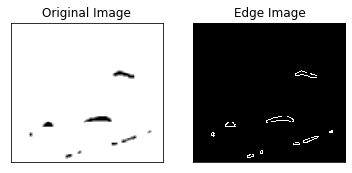

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("img/teile_first/257.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
cv2.imwrite('dst.png',img)

gray   = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray   = cv2.medianBlur(gray, ksize=5)
thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.blur(thresh, ksize=(3, 3))

edges = cv2.Canny(thresh,150,200)
plt.subplot(121),plt.imshow(thresh,cmap = 'gray')
plt.title('Original Image'), plt.xticks(    []), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()
